In [1]:
from liesel_ptm.bspline.ptm import PTMKnots, PTMSpline

In [2]:
import jax
import jax.numpy as jnp
import pandas as pd
import plotnine as p9

In [3]:
nparam = 10
knots = PTMKnots(-4.0, 4.0, nparam=nparam).knots

In [4]:
bs = PTMSpline(knots)

## Vector x, single coef

(300,)
(300,)


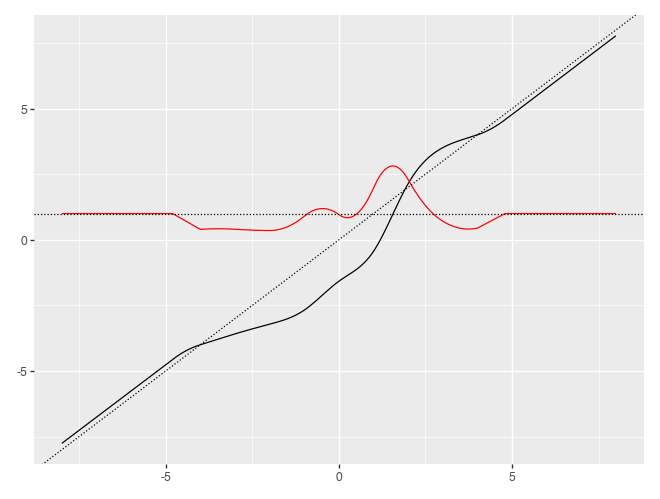

In [5]:
x = jnp.linspace(-8.0, 8.0, 300)
coef = jax.random.normal(jax.random.key(1), (nparam))
fx, fx_deriv = bs.dot_and_deriv_n(x, coef)

print(fx.shape)
print(fx_deriv.shape)

(
    p9.ggplot()
    + p9.geom_line(p9.aes(x, fx))
    + p9.geom_line(p9.aes(x, fx_deriv), color="red")
    + p9.geom_abline(linetype="dotted")
    + p9.geom_hline(p9.aes(yintercept=1.0), linetype="dotted")
)

## Continue linearly

(20, 300)
(20, 300)


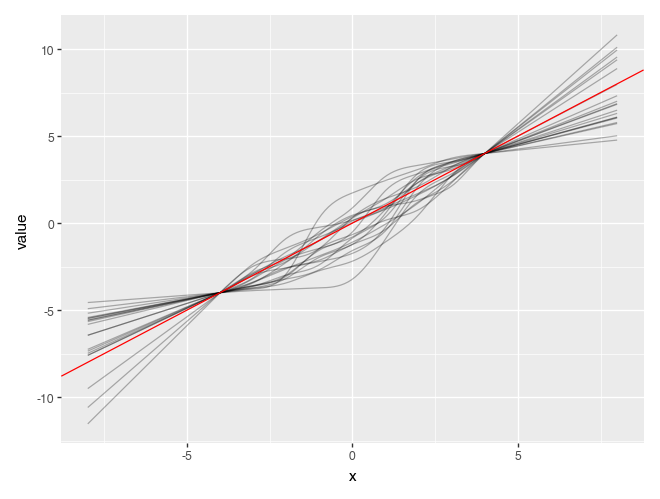

In [6]:
x = jnp.linspace(-8.0, 8.0, 300)
coef = jax.random.normal(jax.random.key(1), (20, nparam))
bs2 = PTMSpline(knots, continue_linearly=True)
fx, fx_deriv = bs2.dot_and_deriv(x, coef)

print(fx.shape)
print(fx_deriv.shape)

df = pd.DataFrame(fx.T)
df["x"] = x
df = df.melt(id_vars="x")
df

(
    p9.ggplot(df)
    + p9.geom_line(p9.aes("x", "value", group="variable"), alpha=0.3)
    + p9.geom_abline(color="red")
)

## Tiny eps

In [ ]:
x = jnp.linspace(-8.0, 8.0, 3000)
coef = jax.random.normal(jax.random.key(1), (20, nparam))
bs2 = PTMSpline(knots, eps=1e-8)
fx, fx_deriv = bs2.dot_and_deriv(x, coef)

(20, 3000)
(20, 3000)


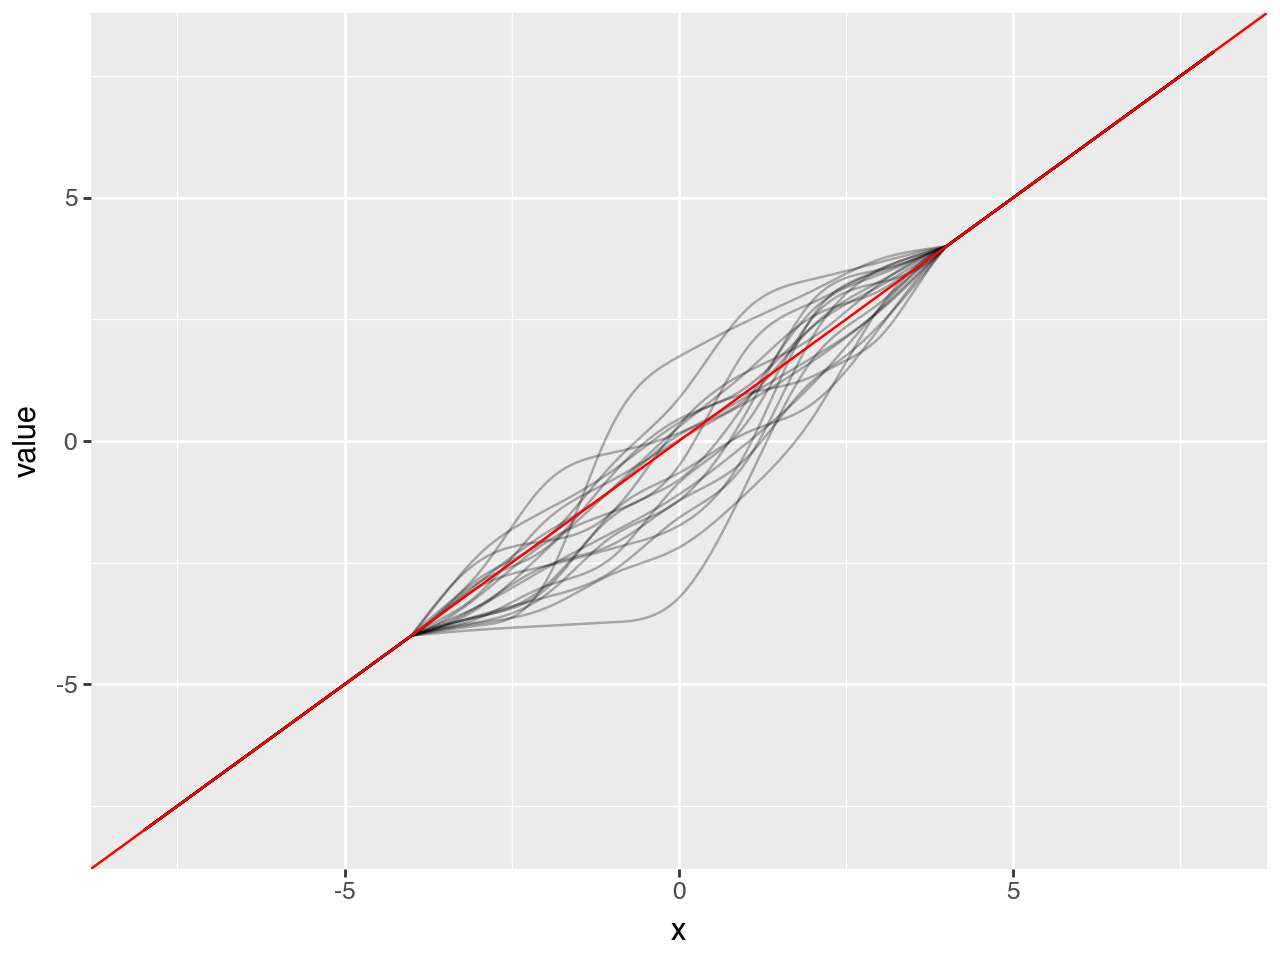

In [ ]:
print(fx.shape)
print(fx_deriv.shape)

df = pd.DataFrame(fx.T)
df["x"] = x
df = df.melt(id_vars="x")
df

(
    p9.ggplot(df)
    + p9.geom_line(p9.aes("x", "value", group="variable"), alpha=0.3)
    + p9.geom_abline(color="red")
)

## Vector x, batched coef

(20, 300)
(20, 300)


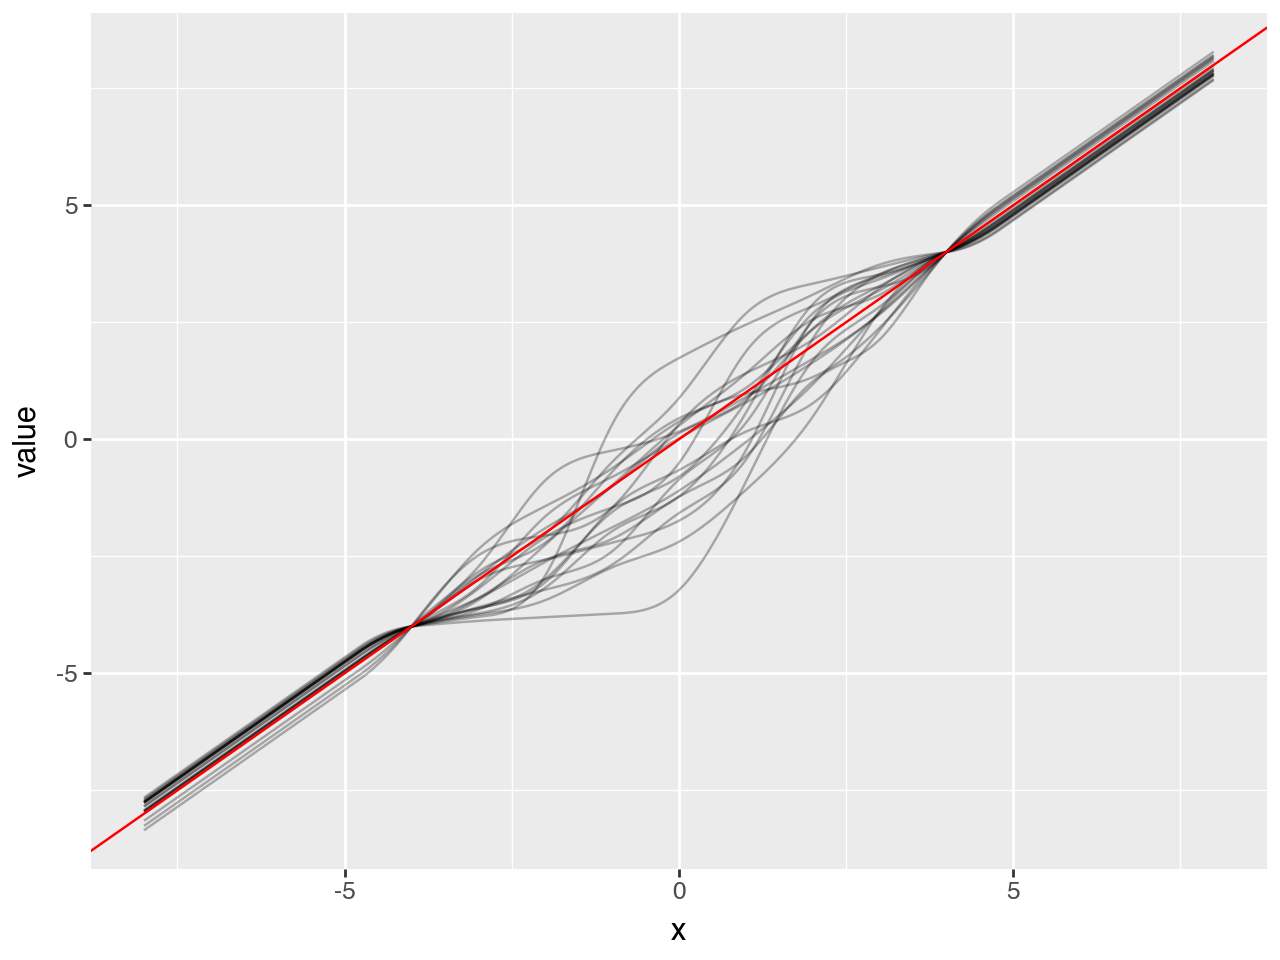

In [ ]:
x = jnp.linspace(-8.0, 8.0, 300)
coef = jax.random.normal(jax.random.key(1), (20, nparam))
fx, fx_deriv = bs.dot_and_deriv(x, coef)

print(fx.shape)
print(fx_deriv.shape)

df = pd.DataFrame(fx.T)
df["x"] = x
df = df.melt(id_vars="x")
df


(
    p9.ggplot(df)
    + p9.geom_line(p9.aes("x", "value", group="variable"), alpha=0.3)
    + p9.geom_abline(color="red")
)

## Big batch (watch memory)

In [ ]:
n = 5000
c = 4
s = 1000
x = jax.random.uniform(jax.random.key(1), (c, s, n))

coef = jax.random.normal(jax.random.key(1), (c, s, nparam))
fx, fx_deriv = bs.dot_and_deriv(x, coef)

fx.shape

(4, 1000, 5000)